Index(['#Passengers'], dtype='object')


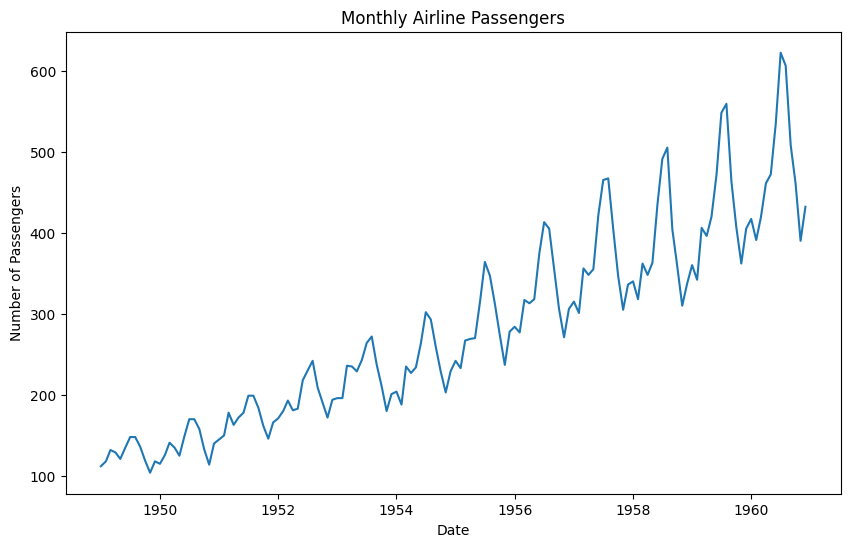

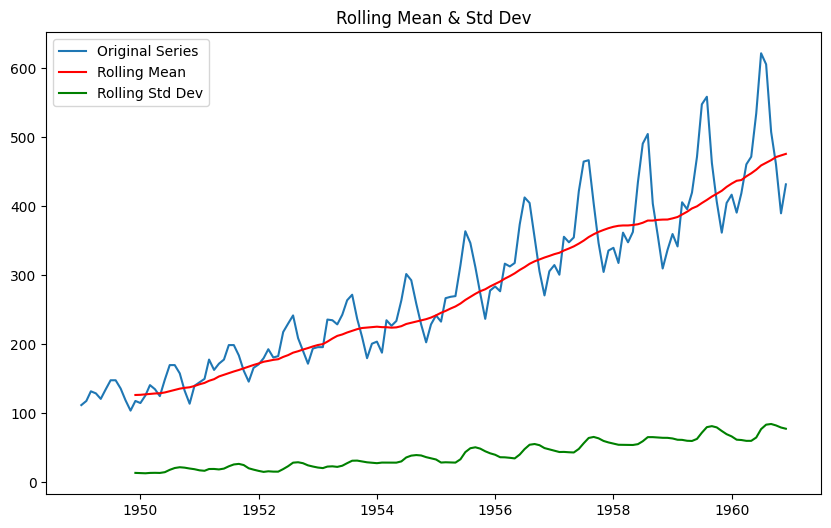

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
The time series is likely non-stationary.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Step 1: Load the dataset from a local path
file_path = '/content/AirPassengers.csv'
df = pd.read_csv(file_path)

# Step 2: Prepare the time series data
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Check the actual column names in the DataFrame
print(df.columns)  # Print the columns to identify the correct name

# Replace 'Passengers' with the actual column name
ts = df['#Passengers'] # Assuming the column is named '#Passengers' based on common dataset format


# Step 3: Plot the time series
def plot_series(ts):
    plt.figure(figsize=(10,6))
    plt.plot(ts)
    plt.title('Monthly Airline Passengers')
    plt.xlabel('Date')
    plt.ylabel('Number of Passengers')
    plt.show()

# Step 4: Plot rolling statistics
def plot_rolling_stats(ts, window=12):
    rolling_mean = ts.rolling(window=window).mean()
    rolling_std = ts.rolling(window=window).std()
    plt.figure(figsize=(10,6))
    plt.plot(ts, label='Original Series')
    plt.plot(rolling_mean, label='Rolling Mean', color='red')
    plt.plot(rolling_std, label='Rolling Std Dev', color='green')
    plt.title('Rolling Mean & Std Dev')
    plt.legend(loc='best')
    plt.show()

# Step 5: Perform ADF Test
def adf_test(ts):
    result = adfuller(ts)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] < 0.05:
        print("The time series is likely stationary.")
    else:
        print("The time series is likely non-stationary.")

# Step 6: Visualize the time series and rolling statistics
plot_series(ts)
plot_rolling_stats(ts)

# Step 7: Perform the Augmented Dickey-Fuller Test
adf_test(ts)